# Predicting the Sale Price of Bulldozers using Machine Learning
In this project, we are going to go through an example of Machine Learning project with the goal of predicting the sale price of Bulldozers.


Since we're trying to predict a number, this kind of problem is known as a **regression** problem.

The data we are using is from the **Kaggle Bluebook for Bulldozers** competition: https://www.kaggle.com/c/bluebook-for-bulldozers/overview 

The download link for data: https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip

Techniques used in here have been inspired and adapted from: https://course18.fast.ai/ml 

### 1. Problem Definition
---> How well can we predict the future sale price of  abulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

### 2. Data
---> Data has been downloaded from Kaggle Bluebook for Bulldozers competition.
More information about the data is here: https://www.kaggle.com/c/bluebook-for-bulldozers/data

### 3. Evaluation
---> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
More information here: www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression metrics is to minimize the error.

* **Our goal for this project is to build a ML model which minimizes RMSLE.**

### 4. Features
---> Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing 

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
# Import training and validation sets
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv")

C:\Users\91822\AppData\Local\Temp\ipykernel_7992\748539243.py:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv")


In [4]:
# Inorder to get rid of the above warning
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [8]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [9]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

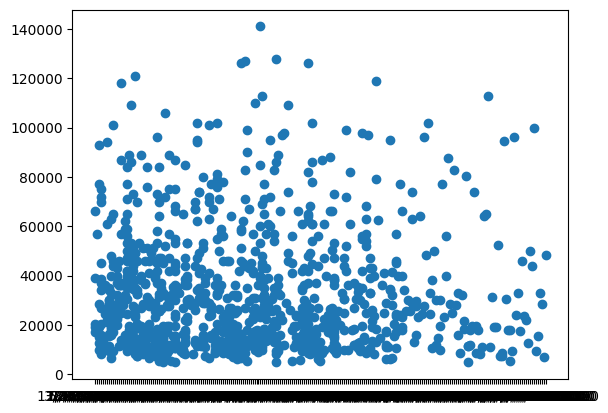

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
# we are just looking at the 1st 1000 beacuse there is just too much entries

In [12]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<Axes: ylabel='Frequency'>

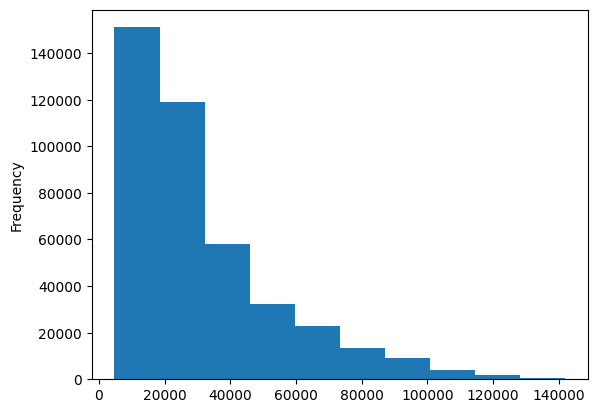

In [13]:
df.SalePrice.plot.hist()

In [14]:
df.saledate.dtype

dtype('O')

### Parsing Dates

Since the column `saledate` is object dtype. 

When we work with time series data (in this case: the "saledate" column), we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our column has dates in it using the `parse-dates` parameter.

In [15]:
# Import data again but this time with parse dates
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [16]:
df.saledate.dtype

dtype('<M8[ns]')

In [19]:
# Pandas has changed the dtype of saledate
df.saledate[:1000]

# look for the above cell to see the difference b/w the two

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

Difference b/w data type "datetime64[ns]" and "<M8[ns]": https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns 

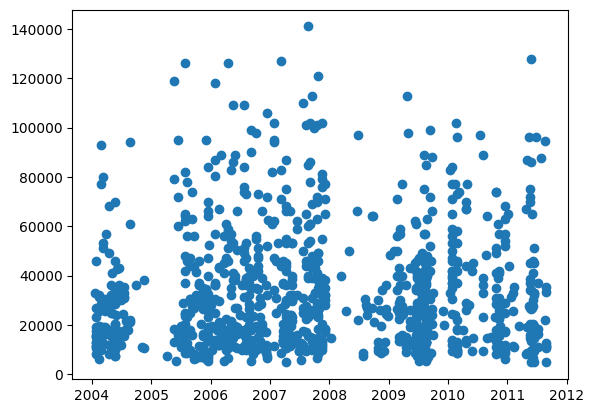

In [20]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [21]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# The above command doesn't shows all the columns
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [25]:
# Looking again at saledate
df.saledate[:20]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sorting DataFrame by saledata

* Whenever we work on time series problems and trying to predict future examples with the past examples given, generally its a good idea to sort the data by date.

In [26]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)

# The above shoud be able to run cause saledate is not an object type data anymore

In [27]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [28]:
df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [29]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Make a copy of the original DataFrame

* Its always a good practice to make a copy of the original dataframe. So, when we manipulate the copy, we've still got our original data.

In [30]:
# Make a copy
df_temp = df.copy()

In [32]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add datetime parameters for saledate column

**Why?**

So that we can enrich our dataset with as much information as possible.

Beacuse, we have parsed saledate, and now we can access the [different datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) of the "saledate" column.

In [38]:
# This attribute will give the year of the saledate column
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [40]:
# This attribute will give the day of the saledate column
df_temp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [41]:
# This attribute will give the month of the saledate column
df_temp[:1].saledate.dt.month

205615    1
Name: saledate, dtype: int32

In [43]:
# Adding a new column "saleYear", "saleMonth", and "saleDay" into the df_temp
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day

# And some other columns as well
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [44]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


That adding of extra columns of datetime data is what we say enrichment of our DataFrame.

In [45]:
# After enriching our DataFrame with datetime features, we can drop the saledate column as we won't need it anymore
df_temp.drop("saledate", axis=1, inplace=True)

In [47]:
# we'll get an error after running this command as saledate doesn't exist anymore
df_temp.saledate

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [48]:
# Check the values of different columns
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

### 5. Modelling
---> We've explored our data (EDA) enough along with some attribute enrichment. So let's try to model.

* Why so early?

Cause we already know the evaluation metric we are heading towards. We could spend more time to do EDA (explanatory data analysis) ourselves, but let's take the help of an ML model with our EDA.

Note: One of the most important goal of any Machine Learning project is reducing the time b/w experiments.

* Which model to choose?

Following the Scikit-Learn machine learning map, we find a RandomForestRegressor() might be a good candidate.

Scikit-Learn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

In [49]:
# Building a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42) # random_state=42 same as np.random.seed(42)

X = df_temp.drop("SalePrice", axis=1)
y = df_temp["SalePrice"]
model.fit(X, y)

ValueError: could not convert string to float: 'Low'

It's showing error because a lot of attributes are of object type.

In [51]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

Also after looking at info we have a lot of missing values in a lot columns.

In [55]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Converting strings into categories
> So for our ML models to work, we need to convert all our data (string/object types) into numbers by converting them into panda categories.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

We can check for different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html#data-types-related-functionality 

In [56]:
df_temp.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,Straight,None or Unspecified,NaN,NaN,1989,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,Standard,Conventional,1989,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,Straight,None or Unspecified,NaN,NaN,1989,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,Standard,Conventional,1989,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,PAT,Lever,NaN,NaN,1989,1989,1,31,1,31


In [65]:
df_temp["UsageBand"].dtypes

dtype('O')

In [66]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

False

In [73]:
pd.api.types.is_object_dtype(df_temp["UsageBand"])

True

In [69]:
pd.api.types.is_string_dtype(df_temp["fiModelDesc"])

True

In [74]:
pd.api.types.is_object_dtype(df_temp["fiModelDesc"])

True

The only explanation I have for why "pd.api.types.is_string_dtype(df_temp["UsageBand"])" is giving `false` while "pd.api.types.is_string_dtype(df_temp["fiModelDesc"])" is giving `true`, is because "UsageBand" NaN (null) values present, while "fiModelDesc" does not have null values present.

In [77]:
# Find the columns which contain string/object types
x = 0
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        x = x+1
        print(x, label)

1 UsageBand
2 fiModelDesc
3 fiBaseModel
4 fiSecondaryDesc
5 fiModelSeries
6 fiModelDescriptor
7 ProductSize
8 fiProductClassDesc
9 state
10 ProductGroup
11 ProductGroupDesc
12 Drive_System
13 Enclosure
14 Forks
15 Pad_Type
16 Ride_Control
17 Stick
18 Transmission
19 Turbocharged
20 Blade_Extension
21 Blade_Width
22 Enclosure_Type
23 Engine_Horsepower
24 Hydraulics
25 Pushblock
26 Ripper
27 Scarifier
28 Tip_Control
29 Tire_Size
30 Coupler
31 Coupler_System
32 Grouser_Tracks
33 Hydraulics_Flow
34 Track_Type
35 Undercarriage_Pad_Width
36 Stick_Length
37 Thumb
38 Pattern_Changer
39 Grouser_Type
40 Backhoe_Mounting
41 Blade_Type
42 Travel_Controls
43 Differential_Type
44 Steering_Controls


In [78]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [81]:
# This will turn all of the object types into category values

for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [82]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [83]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [84]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [86]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In the above few lines, what has happened was...
* We changed our object columns to categories with the help of Pandas Categories.
* What it does is - it divides values into categories of data E.g.: Sate attributes divided into State categories, which hence are stored in State columns now.

In [89]:
df_temp["state"][:30]

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
54653     Florida
81383     Florida
204924    Florida
135376    Florida
113390    Florida
113394    Florida
116419    Florida
32138     Florida
127610    Florida
76171     Florida
127000    Florida
128130    Florida
127626    Florida
55455     Florida
55454     Florida
144032    Florida
54438     Georgia
144952    Florida
205752    Florida
28927     Georgia
86971     Florida
67034     Florida
87602     Florida
53101     Florida
205784    Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [90]:
print(df_temp["state"][:30], df_temp["state"][:30].cat.codes)

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
54653     Florida
81383     Florida
204924    Florida
135376    Florida
113390    Florida
113394    Florida
116419    Florida
32138     Florida
127610    Florida
76171     Florida
127000    Florida
128130    Florida
127626    Florida
55455     Florida
55454     Florida
144032    Florida
54438     Georgia
144952    Florida
205752    Florida
28927     Georgia
86971     Florida
67034     Florida
87602     Florida
53101     Florida
205784    Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming'] 205615    43
274835     8
141296     8
212552     8
62755      8
54653      8
81383      8
204924     8
135376     8
113390     8
113394     8
116419     8
32138      8
127610     8
76171      8
127000     8
128130     8
127626     8
55455      8
55454      8
144032     8
54438      9
144952  

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [94]:
# Check missing data
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [96]:
# Gives ratios of missing data per column
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

#### Saving the preprocessed data

In [97]:
# Export the current temp dataframe
df_temp.to_csv("train_temp1.csv", index=False)

In [98]:
# Import the preprocessed data
df_temp = pd.read_csv("train_temp1.csv",
                     low_memory=False) 

In [99]:
df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,Straight,None or Unspecified,NaN,NaN,1989,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,Standard,Conventional,1989,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,Straight,None or Unspecified,NaN,NaN,1989,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,Standard,Conventional,1989,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,PAT,Lever,NaN,NaN,1989,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,PAT,None or Unspecified,NaN,NaN,2012,2012,4,28,5,119
412694,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,2012,2012,4,28,5,119
412695,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,2012,2012,4,28,5,119
412696,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,2012,2012,4,28,5,119


In [100]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill missing values

*  1. Filling the numerical missing values

In [103]:
# Finding numeric value containg columns
x = 0
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        x = x + 1
        print (x, label)

1 SalesID
2 SalePrice
3 MachineID
4 ModelID
5 datasource
6 auctioneerID
7 YearMade
8 MachineHoursCurrentMeter
9 saleyear
10 saleYear
11 saleMonth
12 saleDay
13 saleDayOfWeek
14 saleDayOfYear


In [105]:
# Check for which numeric columns have missing values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [106]:
# Filling each numeric rows with the median

for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():

            # Add a binary column which tells us if the data was missing or not
            df_temp[label+"_is_missing"] = pd.isnull(content)

            # Fill missing numeric values with median
            df_temp[label] = content.fillna(content.median())

**Important Notes:**

1. Why add a binary column?
    * Because in order to know that which of the values was missing and which of values we're not. (Because there might be a reason why it was missing. So in order to retain which values were missing and which were not, we create this coulmn)

2. Why median over mean?
    * Because median is more robust in nature than mean (atleast for very large amount of values). Example is given below.

In [107]:
# Checking again if there are any null numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

# last time output was : auctioneerID, MachineHoursCurrentMeter

Since no output this means that no numeric columns have any missing values.

* Why the binary column was added? (Explained above)

E.g.: Column `auctioneerID`.
    * Previous amount of missing values in it was: 20136 (code was run few steps above)
    * Therefore now in binary column named `auctioneerID_is_missing`. There should be 20136 "True" or "1" present.
    * This means that we filled 20136 values as median.

In [109]:
# Check to see about our binary column
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

* Why median?

In [113]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

The above example just demonstrates that why median is more robust than mean...

* 2. Filling and turning categorical variables into numbers

In [118]:
# Check for columns which aren't numeric
x = 0
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        x = x + 1
        print(x, label)

1 UsageBand
2 fiModelDesc
3 fiBaseModel
4 fiSecondaryDesc
5 fiModelSeries
6 fiModelDescriptor
7 ProductSize
8 fiProductClassDesc
9 state
10 ProductGroup
11 ProductGroupDesc
12 Drive_System
13 Enclosure
14 Forks
15 Pad_Type
16 Ride_Control
17 Stick
18 Transmission
19 Turbocharged
20 Blade_Extension
21 Blade_Width
22 Enclosure_Type
23 Engine_Horsepower
24 Hydraulics
25 Pushblock
26 Ripper
27 Scarifier
28 Tip_Control
29 Tire_Size
30 Coupler
31 Coupler_System
32 Grouser_Tracks
33 Hydraulics_Flow
34 Track_Type
35 Undercarriage_Pad_Width
36 Stick_Length
37 Thumb
38 Pattern_Changer
39 Grouser_Type
40 Backhoe_Mounting
41 Blade_Type
42 Travel_Controls
43 Differential_Type
44 Steering_Controls


In [119]:
pd.Categorical(df_temp["state"])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [120]:
pd.Categorical(df_temp["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [122]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

This is how we turn the categorical types attributes into integer types.
And thats what we are going to do for each and every column.

**Important Point:** ().codes gives -1 to missing/null values.
That is why we are going to add 1, so that our whole data remains positive.

In [125]:
# Eg of negative values
pd.Categorical(df_temp["UsageBand"]).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [127]:
pd.Categorical(df_temp["UsageBand"]).codes + 1
# to make all values positive i.e why we are going to add 1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [129]:
# Turn categorical variables into numbers and fill missing values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        
        # Add binary column to indicate whether the sample had missing values
        df_temp[label+"_is_missing"] = pd.isnull(content)

        # Turn categories into numbers and add 1 (why? discussed above)
        df_temp[label] = pd.Categorical(content).codes + 1

In [130]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 104 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(11), int8(40)
memory usage: 81.1 MB


In [131]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [132]:
# Last check to see if there are anymore missing values
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 104, dtype: int64

In [133]:
df_temp.isna().sum()[:50]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

Now that all of our data is numeric and our dataframe doesn't have any missing values, we should be able to build a machine learning model.

In [134]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [136]:
%%time
# magic func - to check how much time a particular cell takes to run

# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)


X = df_temp.drop("SalePrice", axis=1)
y = df_temp["SalePrice"]
model.fit(X, y)

CPU times: total: 59min 24s
Wall time: 7min 47s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [138]:
# Score the model
model.score(X, y)

0.9875639704367384

The model we made is able to predict the prices of Bulldozers with almost 99 % accuracy (it's not actually accuracy but lets just say it is).

**Important Note:** This metric is not reliable...

**But, why?** Beacuse it is being trained and tested on the same data.

- That is why we going to split the data into train/valid sets.

### Splitting data into train and valid sets.

According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem. E.g. using past events to try and predict future events.

That is why, randomly splitting our data into train and test sets using something like `train_test_split()` wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:

* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

For more on making good training, validation and test sets, check out the post [How (and why) to create a good validation set](https://www.fast.ai/posts/2017-11-13-validation-sets.html) by Rachel Thomas

In [139]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [142]:
df_temp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [143]:
df_temp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [144]:
# mentioned above
# before 2012 - training set
# since 2012 - valid set

# in 2012 - sales: 11573

# Splitting data into training and validation sets
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

In [145]:
len(df_val), len(df_train)

(11573, 401125)

In [146]:
# Split data into X and y
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train.SalePrice

X_valid = df_val.drop("SalePrice", axis=1)
y_valid = df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 103), (401125,), (11573, 103), (11573,))

### Building and Evaluation function

In [158]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle (y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """

    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model on few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}

    return scores

### Testing our models on a subset (to tune the hyperparameters) (to reduce the time it takes to train a model)

In [150]:
# This takes for too long... for experimenting

# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(X_train, y_train)

In [151]:
# To make it execute in less time - could slice our model
# model.fit(X_train[:10000], y_train[:10000])

# but there is still a better way

In [153]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [154]:
%%time
# Cutting down on the max number of samples each estimator can see
# done so inorder to improve training time
model.fit(X_train, y_train)

CPU times: total: 1min 33s
Wall time: 12.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [159]:
show_scores(model)

{'Training MAE': 5558.029533736366,
 'Valid MAE': 7180.925196578243,
 'Training RMSLE': 0.25764602660613584,
 'Valid RMSLE': 0.2935626759241935,
 'Training R^2': 0.8608489574877145,
 'Valid R^2': 0.8314078304866829}

### Hyperparameter tuning with RandomizedSearchCV


In [162]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators":np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features":[0.5, 1, "sqrt", "log2"], #auto will not work anymore in this
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 21.7 s
Wall time: 7.25 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [163]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [164]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 7169.846039286502,
 'Valid MAE': 8423.274626436205,
 'Training RMSLE': 0.3182602368759931,
 'Valid RMSLE': 0.3400308294797168,
 'Training R^2': 0.7799866075926414,
 'Valid R^2': 0.7707085020197032}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of RandomizedSearchCV.

* Ran by Dan from video which took him almost 2 hours to run. So it's better to just copy and code.
* After running it, we may find something different. But this should almost work. 

In [168]:
%%time

# Best hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    random_state=42,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 7min 45s
Wall time: 1min 4s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [169]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2937.2525731515443,
 'Valid MAE': 5936.679686806379,
 'Training RMSLE': 0.1439509746528146,
 'Valid RMSLE': 0.24593161521689705,
 'Training R^2': 0.9592159468114806,
 'Valid R^2': 0.8823947394619753}

In [170]:
# Scores on rs_model (only trained on ~10000 examples)
show_scores(rs_model)

{'Training MAE': 7169.846039286502,
 'Valid MAE': 8423.274626436205,
 'Training RMSLE': 0.3182602368759931,
 'Valid RMSLE': 0.3400308294797168,
 'Training R^2': 0.7799866075926414,
 'Valid R^2': 0.7707085020197033}

As you can see on `Valid RMSLE` the difference b/w the 2 models.

Note: Smaller the RMSLE, the better.

### Making predictions on the test data

In [172]:
# Importing the test data
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [173]:
# Make predictions on test dataset
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


It won't work because
1. Number of columns are not matching
2. Object type attributes are present
3. Missing values also exist

In [174]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [177]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [179]:
df_test.columns, len(df_test.columns)

(Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
        'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
        'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
        'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
        'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
        'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
        'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
        'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
        'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
        'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
        'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
        'Differential_Type', 'Steering_Controls'],
       dtype='object'),
 52)

In [180]:
X_train.columns, len(X_train.columns)

(Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
        'fiBaseModel',
        ...
        'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
        'Thumb_is_missing', 'Pattern_Changer_is_missing',
        'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
        'Blade_Type_is_missing', 'Travel_Controls_is_missing',
        'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
       dtype='object', length=103),
 103)

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [182]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
    
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
    
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
                
        # Fill the categorical missing data & turn them into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)

            # add +1 to the category column beacause missing categories get -1 as values
            df[label] = pd.Categorical(content).codes + 1
            

    return df
    

In [183]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [184]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


#### Still 2 columns missing

In [185]:
# Still trying to make predictions on updated test dataset
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing
- saleyear


**Note:** Despite showing which 2 columns are missing.

We will still try to find which columns are missing.

In [186]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing', 'saleyear'}

`saleyear` columns was a mistake of mine... 

It should not have been in there in the 1st place.

But since its there now, we will carry on and add it anyways.


> While `auctioneerID_is_missing` is missing because, there was no missing values in the `auctioneerID` column. That is why it did not get created.

In [187]:
X_train["saleyear"]

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saleyear, Length: 401125, dtype: int64

In [188]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False

# Manually adding 'saleyear' column
df_test["saleyear"] = df_test["saleYear"]

In [192]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing,saleyear
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,False,2012
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,False,False,False,2012
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,True,True,True,True,True,False,2012
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,True,True,True,True,True,False,2012
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,False,False,False,True,True,False,2012


In [198]:
df_test["saleyear"].value_counts(), df_test["saleYear"].value_counts()
# just checking...

(saleyear
 2012    12457
 Name: count, dtype: int64,
 saleYear
 2012    12457
 Name: count, dtype: int64)

In [199]:
set(X_train.columns) - set(df_test.columns)

set()

So the test dataframe has the same features as that of our training datframe.

Lets try to make predictions...

In [201]:
# Make predictions on test dataset (update with same no of rows)
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


Still not ready as now we have to match the exact order of the added rows.

That is, the order of the columns in the training dataset, should match the order of the columns in our test dataset.

In [202]:
# Match column order from X_train to df_test (to predict on columns, they should be in the same order they were fit on)
df_test = df_test[X_train.columns]

Now the test dataset column names and column order matches the training dataset, we should be able to make predictions on it using our trained model.

In [203]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

In [205]:
test_preds

array([17081.99729742, 16409.38792259, 45849.47906929, ...,
       14123.81748021, 17497.38246556, 26872.47077502])

In [206]:
len(test_preds)

12457

### Finally our predictions work...

But, it is not in the same format as Kaggle has asked for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

So now we will format our predictions.

In [208]:
# Format predictions into the same format as Kaggle
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

In [209]:
df_preds

,SalesID,SalesPrice
0,1227829,17081.997297
1,1227844,16409.387923
2,1227847,45849.479069
3,1227848,66478.584782
4,1227863,59562.095680
...,...,...
12452,6643171,40021.182750
12453,6643173,11966.950755
12454,6643184,14123.817480
12455,6643186,17497.382466


In [210]:
# Export prediction data
df_preds.to_csv("test_predictions.csv", index=False)

### Feature Importance

Feature Importance seeks to figure out which different attributes of the data were most important in predicting the target the variable (SalePrice).

In [211]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.11238859e-02, 1.85306392e-02, 3.99817251e-02, 8.85411580e-04,
       3.03600876e-03, 2.05221286e-01, 2.79847084e-03, 9.46627219e-04,
       4.11688708e-02, 3.87533816e-02, 6.41499913e-02, 4.55889896e-03,
       1.48765123e-02, 1.64054113e-01, 4.05206566e-02, 5.63465680e-03,
       4.17877606e-03, 2.25952957e-03, 3.28515772e-03, 7.87050606e-02,
       4.33951058e-04, 3.81984307e-04, 8.04319465e-04, 1.55136814e-04,
       1.11511776e-03, 2.39230075e-05, 9.27389382e-05, 6.53568143e-03,
       2.82536486e-03, 2.09869024e-03, 3.94751023e-03, 6.95120358e-03,
       3.55489169e-03, 5.17040232e-03, 4.17135912e-03, 6.17710068e-03,
       8.39436906e-04, 1.02435569e-02, 1.35843290e-03, 5.64496603e-03,
       1.54758780e-03, 7.58595978e-04, 2.51847594e-03, 6.50283700e-04,
       2.75375577e-04, 3.42535328e-04, 2.38184058e-04, 1.71211208e-03,
       7.61175275e-04, 1.82859841e-04, 9.44088694e-04, 3.87675760e-02,
       3.68355462e-02, 3.77257110e-03, 5.38193725e-03, 2.73224107e-03,
      

In [212]:
len(ideal_model.feature_importances_)

103

In [213]:
X_train.shape

(401125, 103)

In [214]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

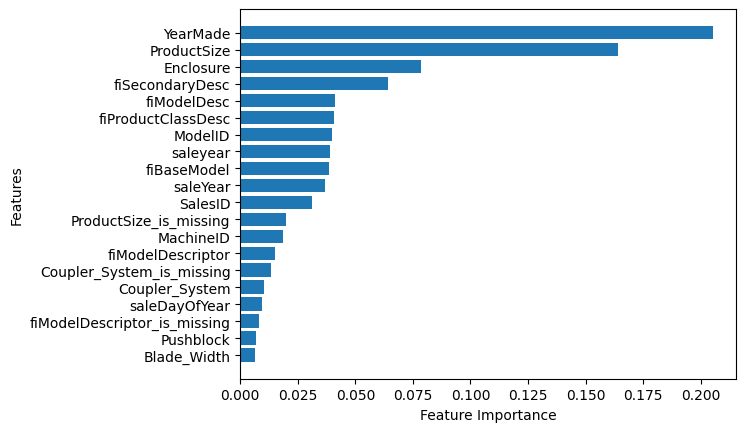

In [215]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [216]:
# Another way

import seaborn as sns

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

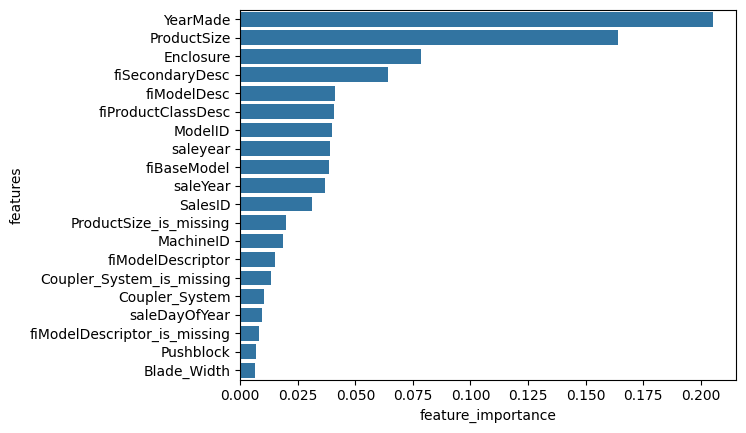

In [217]:
plot_features(X_train.columns, ideal_model.feature_importances_)

**Question to finish:** Why might knowing the feature importances of a trained machine learning model be helpful?

**Final challenge/extension:** What other machine learning models could you try on our dataset? Hint: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html check out the regression section of this map, or try to look at something like CatBoost.ai or XGBooost.ai.
